Dataset shape (rows, columns): (9551, 21)

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


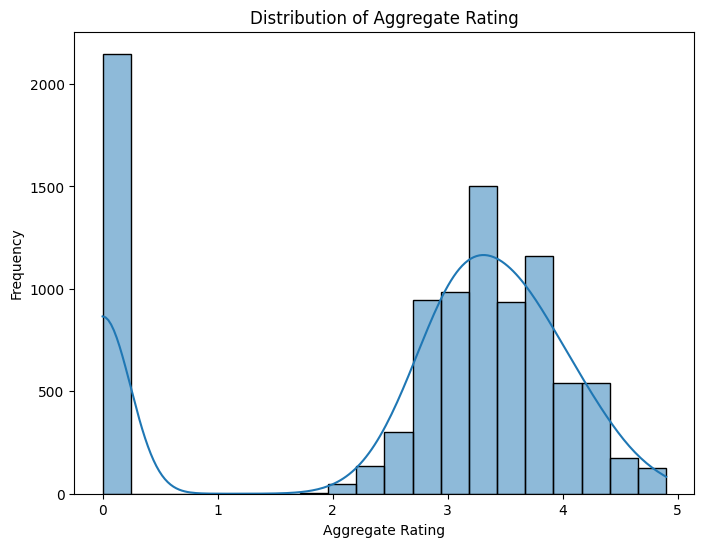


Class distribution of Aggregate rating:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


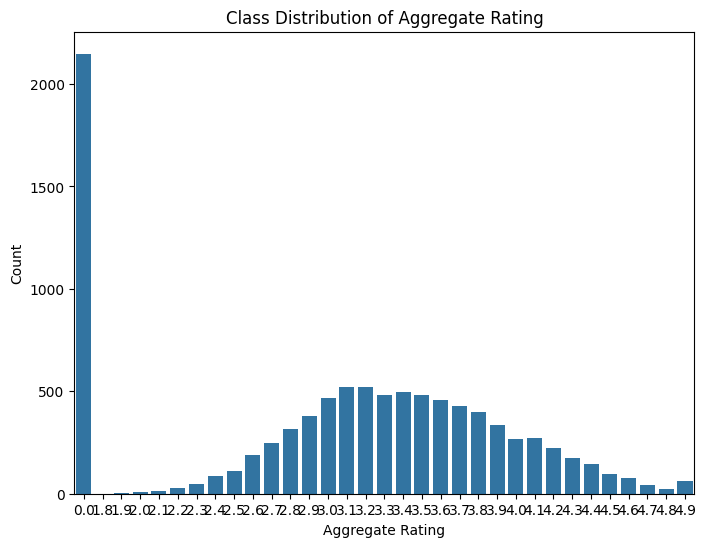

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual dataset file path)
df = pd.read_csv('/content/Dataset .csv')

# Task 1.1: Explore the dataset and identify the number of rows and columns
print("Dataset shape (rows, columns):", df.shape)

# Task 1.2: Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Task 1.3: Handle missing values (Imputation or removal depending on your dataset)
# Example: Drop rows with missing values or fill with the median (or any appropriate strategy)

# Option 1: Drop rows with missing target values
df.dropna(subset=['Aggregate rating'], inplace=True)

numeric_df = df.select_dtypes(include=['number'])  # Select numerical columns
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median())  # Fill NaNs in numerical columns with medians

# Option 3: Fill missing values in categorical columns with the mode (for object/categorical)
# Select only object/categorical columns before filling with mode
categorical_df = df.select_dtypes(include=['object'])  # Select object/categorical columns
for col in categorical_df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
# Task 1.4: Perform data type conversion if necessary
# Example: Convert the 'Aggregate rating' column to numeric if it's in string format
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Task 1.5: Analyze the distribution of the target variable ("Aggregate rating")
# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Aggregate rating'], kde=True, bins=20)
plt.title("Distribution of Aggregate Rating")
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Task 1.6: Identify any class imbalances in the target variable ("Aggregate rating")
# For example, if Aggregate rating is categorical (e.g., 1-5 ratings), check the balance
rating_counts = df['Aggregate rating'].value_counts()
print("\nClass distribution of Aggregate rating:")
print(rating_counts)

# Plot class imbalance (if applicable)
plt.figure(figsize=(8, 6))
sns.countplot(x='Aggregate rating', data=df)
plt.title('Class Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()
